# K-Means Clustering

https://neptune.ai/blog/k-means-clustering

K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid and assign it to a cluster.
The goal is to identify K number of groups in the dataset.

In [1]:
import torch
import math, matplotlib.pyplot as plt, operator, torch
torch.manual_seed(1);

# Create Data

In [2]:
n_clusters=6
n_samples=250

In [3]:
centroids = torch.randint(-35, 35, (n_clusters, 2)).float()
centroids

tensor([[  0.,  24.],
        [-31.,   3.],
        [-32., -22.],
        [-14.,  26.],
        [ 14.,  17.],
        [-17.,  34.]])

In [4]:
from torch.distributions.multivariate_normal import MultivariateNormal
from torch import tensor

In [5]:
def sample(m): 
    return MultivariateNormal(m, torch.diag(tensor([5.,5.]))).sample((n_samples,))

In [6]:
sample(centroids[0]).shape

torch.Size([250, 2])

In [7]:
slices = [sample(c) for c in centroids]
len(slices), slices[0].shape # 6, 250, 2

(6, torch.Size([250, 2]))

In [8]:
data = torch.cat(slices)
data.shape # 250*6=1,500, 2

torch.Size([1500, 2])

In [9]:
def plot_data(centroids, data, n_samples, ax=None):
    if ax is None: _,ax = plt.subplots()
    for i, centroid in enumerate(centroids):
        samples = data[i*n_samples:(i+1)*n_samples]
        ax.scatter(samples[:,0], samples[:,1], s=1)
        ax.plot(*centroid, markersize=10, marker="x", color='k', mew=5)
        ax.plot(*centroid, markersize=5, marker="x", color='m', mew=2)

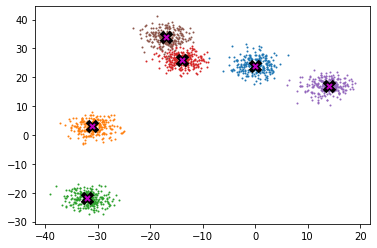

In [10]:
plot_data(centroids, data, n_samples)

# K-means

- Choose random K points - let's choose the first N
- Find distance between each point and centroids


In [11]:
data.shape

torch.Size([1500, 2])

In [16]:
# Step 1: Choosing the number of clusters
K = 6

In [13]:
data[0].numpy()

array([ 0.7964461, 22.532766 ], dtype=float32)

In [50]:
data[1].min()

tensor(1.5093)

In [114]:
# Step 2: Initializing centroids
# k_centroids = tensor([data[0].numpy(), data[250].numpy(), data[500].numpy(), data[750].numpy(), data[1000].numpy(), data[1250].numpy()])

def init_centroids():
    r_idx = torch.randint(K*250,(1,K)).squeeze()
    r_idx

    k_centroids = torch.index_select(data, 0, r_idx)

#     k_centroids = tensor([
#         data[0].numpy(), 
#         data[1].numpy(), 
#         data[2].numpy(), 
#         data[3].numpy(), 
#         data[4].numpy(),
#         data[5].numpy(),
#     ])

#     k_centroids = tensor([data[0].numpy(), data[250].numpy(), data[500].numpy(), data[750].numpy(), data[1000].numpy(), data[1250].numpy()])

    return k_centroids
    
k_centroids = init_centroids()  

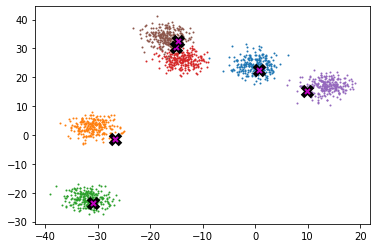

In [95]:
plot_data(k_centroids, data, n_samples)

In [18]:
# Step 3: Assign data points to the nearest centroids

## Step 4. Re-initialize centroids
Next, we will re-initialize the centroids by calculating the average of all data points of this cluster.

- Find all data points belongs to each cluster
    - For each cluster, calculate the average for accross two different axis x and y.
```
df.group_by('Cluster').mean()
```

In [92]:
def do_one(d):
    if d: 
        one_step()
    ax.clear()
    plot_data(k_centroids, data, n_samples, ax=ax)

In [112]:
data.shape

torch.Size([1500, 2])

In [88]:
def one_step():
    clusters = torch.empty((1500))

    for i,  point in enumerate(data):
        min_dist = float('inf')
        cluster_idx = None
        for j in range(K):
            dist = ((point - k_centroids[j]) ** 2).sum().sqrt()
            if dist < min_dist:
                min_dist = dist
                cluster_idx = j
        clusters[i] = tensor(cluster_idx)
    
    clusters_avg = torch.zeros((K, 3))
    clusters_avg

    for i, point in enumerate(data):
        idx = int(clusters[i])

        # sum of points x
        clusters_avg[idx][0] = clusters_avg[idx][0] + data[i][0]

        # sum of points y
        clusters_avg[idx][1] = clusters_avg[idx][1] + data[i][1]

        # number of points
        clusters_avg[idx][2] += 1
    
    
    for i in range(K):
        k_centroids[i,0] = clusters_avg[i,0] / clusters_avg[i,2]
        k_centroids[i,1] = clusters_avg[i,1] / clusters_avg[i,2]
    
    

In [89]:
one_step()

In [77]:
k_centroids

tensor([[-1.5723e-02,  2.4236e+01],
        [-3.0873e+01,  2.8655e+00],
        [-3.1890e+01, -2.2058e+01],
        [-1.4373e+01,  2.6657e+01],
        [ 1.3674e+01,  1.7105e+01],
        [-1.6860e+01,  3.4680e+01]])

## Step 5
We will keep repeating steps 3 and 4 until we have an optimal centroids and the assignments of data points to correct clusters are not changing anymore

In [85]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

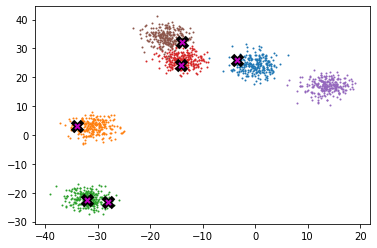

In [118]:
k_centroids = init_centroids()
plot_data(k_centroids, data, n_samples)

In [119]:
# create your own animation
X = data.clone()
fig,ax = plt.subplots()
ani = FuncAnimation(fig, do_one, frames=5, interval=500, repeat=False)
plt.close()
HTML(ani.to_jshtml())